In [30]:
# 필요한 라이브러리들 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# csv를 읽어와서 Pandas DataFrame으로 저장


df1 = pd.read_csv(rf'data\2000_2001_hitter.csv') 
df2 = pd.read_csv(rf'data\2002_2013_hitter.csv') 
df3 = pd.read_csv(rf'data\2014_hitter.csv')

df1.head()

df2.tail()

df3.sample(5)

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
53,2014조동화,2014,54,조동화,SK,0.262,125,522,443,74,...,26,0.328,0.143,0.063205,0.146727,0.539359,48.898621,3.520701,0.293759,48.544
20,2014채태인,2014,21,채태인,삼성,0.317,124,541,492,69,...,45,0.362,0.000,0.166667,0.252033,0.819767,89.166285,6.878542,0.367235,83.062
47,2014김성현,2014,48,김성현,SK,0.284,122,476,398,73,...,29,0.250,0.000,0.092965,0.248744,0.742373,62.270168,5.406092,0.336888,62.032
54,2014김재호,2014,55,김재호,두산,0.252,122,421,341,50,...,21,0.298,0.000,0.073314,0.231672,0.620818,41.969406,3.867488,0.304498,44.468
15,2014이진영,2014,16,이진영,LG,0.325,119,468,412,53,...,34,0.339,0.000,0.099515,0.211165,0.759450,68.528205,6.126694,0.350640,66.816


In [32]:
# 파일 합치기
df_combined = pd.concat([df1, df2, df3], ignore_index=True) # 기존 인덱스 무시 
df_combined.head()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.976667,100.354529,8.286154,0.400138,92.804,NaN,NaN,NaN,NaN,NaN
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,1.063830,115.473840,9.306847,0.431993,105.000,NaN,NaN,NaN,NaN,NaN
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.931655,86.204956,8.224501,0.400969,77.820,NaN,NaN,NaN,NaN,NaN
3,2000송지만,2000,4,송지만,한화,0.338,120,530,468,158,...,1.110092,119.916981,9.811389,0.436688,107.594,NaN,NaN,NaN,NaN,NaN
4,2000데이비스,2000,5,데이비스,한화,0.334,107,458,419,140,...,0.923588,82.605677,7.125729,0.394586,80.284,NaN,NaN,NaN,NaN,NaN


In [33]:
# 변수 선택
X = df_combined[['OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = df_combined['YrPlayer']

print(X.shape, y.shape)
X.head()
y.head()

(649, 8) (649,)


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

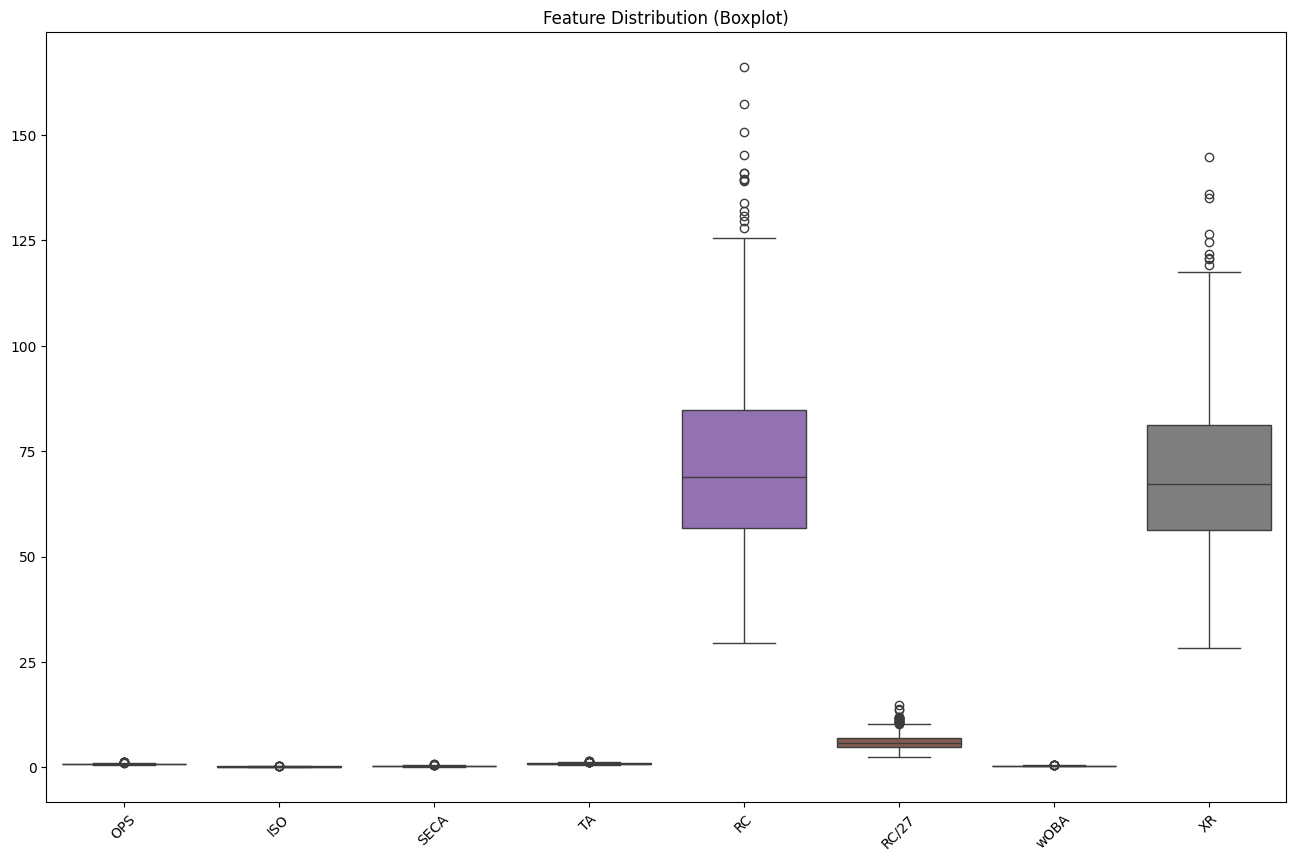

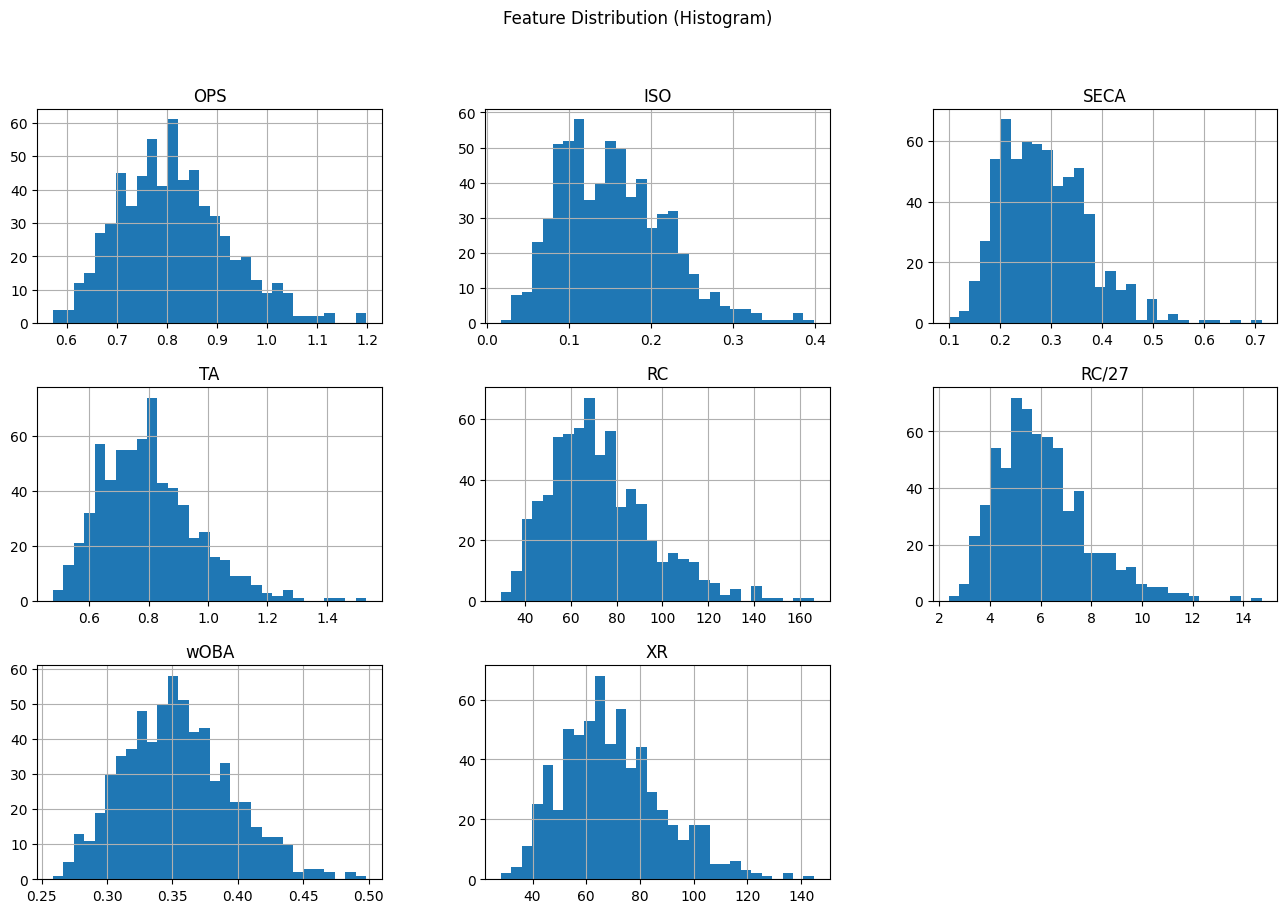

In [34]:
# 데이터 분포 확인
# 데이터 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.boxplot(data=X)
plt.title('Feature Distribution (Boxplot)')
plt.xticks(rotation=45)
plt.show()

# 히스토그램으로도 확인 가능
X.hist(figsize=(16, 10), bins=30)
plt.suptitle('Feature Distribution (Histogram)')
plt.show()

In [35]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 데이터 표준화 
X_scaled

# # 스케일링된 데이터프레임으로 변환 (옵션)
# X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
# X_scaled_df.head()

array([[ 0.97614887, -0.07422939,  0.10417649, ...,  1.20484091,
         1.11880719,  1.21433377],
       [ 1.89711625,  1.67989079,  1.05416505, ...,  1.75823146,
         1.89486616,  1.85744936],
       [ 1.10761611,  0.61991005, -0.16048453, ...,  1.1714146 ,
         1.13904003,  0.42420225],
       ...,
       [-0.42233048, -0.05169927,  0.77350431, ..., -0.32541846,
        -0.43538549, -0.33597768],
       [-1.46085838, -1.39601302, -1.62726689, ..., -1.37885116,
        -1.47288829, -1.11957047],
       [-1.28467954, -1.24146838, -0.64887581, ..., -1.19083305,
        -1.21125882, -1.3345048 ]], shape=(649, 8))

In [36]:
# 최적의 k 찾기
from sklearn.cluster import KMeans

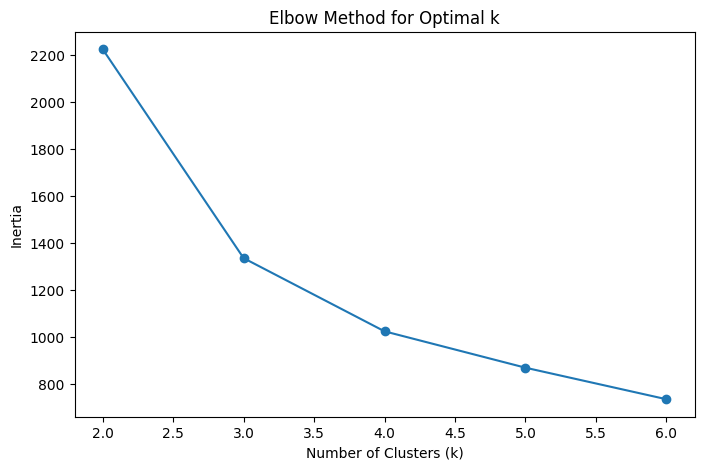

In [37]:
# 엘보우 기법으로 최적의 k 찾기
inertia = []
K_range = range(2, 7)  # 2~10까지 k값 실험

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

k=2, silhouette_score=0.477
k=3, silhouette_score=0.427
k=4, silhouette_score=0.353


c:\Users\User\miniconda3\envs\py313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\miniconda3\envs\py313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\miniconda3\envs\py313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\miniconda3\envs\py313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\miniconda3\envs\py313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing 

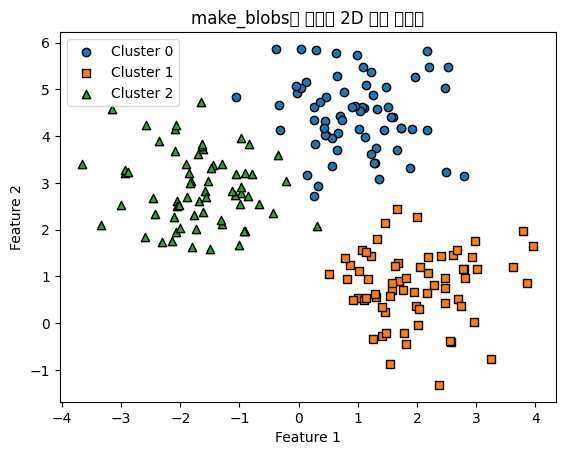

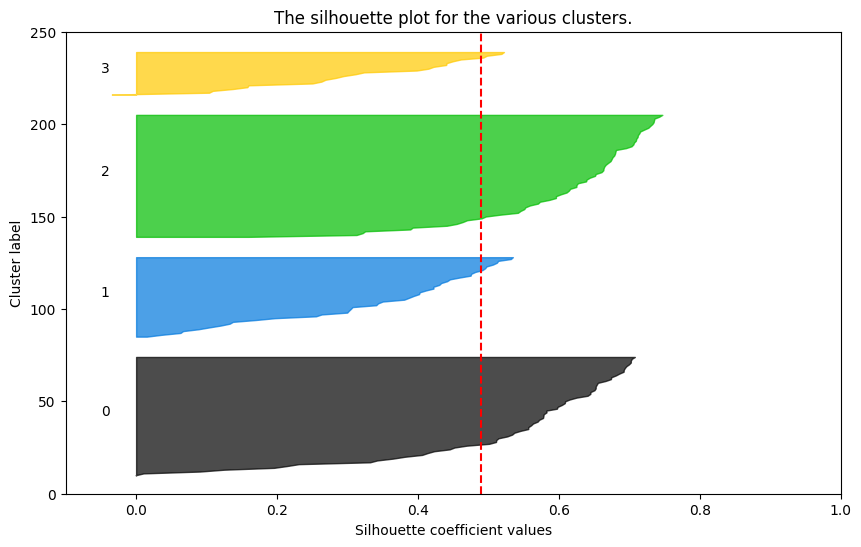

In [38]:
# 실루엣 점수 확인

# 실루엣 점수 확인
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"k={k}, silhouette_score={score:.3f}")

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# 2차원 데이터 200개, 3개 군집 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

# 각 군집별로 산점도 시각화
markers = ['o', 's', '^']
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], marker=markers[i], label=f'Cluster {i}', edgecolor='k')

plt.title('make_blobs로 생성한 2D 군집 데이터')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

import silhouette_analysis as s
s.silhouette_plot(X,k)



In [ ]:
# 군집화 결과 분석 

# 데이터프레임 생성
df = pd.DataFrame(X, columns=X.columns)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster = kmeans.fit_predict(X_scaled)
df['cluster'] = cluster
df.head()


In [ ]:
# 군집의 데이터 특징 분석
cols = df.columns[:-1]

plt.figure(figsize=(15,8))
for i, col in enumerate(cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(data=df, y=col, hue='cluster', palette='muted')
    plt.title(col)
plt.tight_layout()

In [ ]:
# 데이터프레임에 개별 데이터 실루엣 계수 컬럼 추가
from sklearn.metrics import silhouette_samples

# 각 데이터의 실루엣 계수 계산
df['silhouette'] = silhouette_samples(X_scaled, df['cluster'])

df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804,0,0.362335
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,3,0.483962
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820,0,0.461207
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,3,0.548835
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284,0,0.535987


In [ ]:
# 잘못 군집화 된 클러스터
df.loc[df['silhouette']<0]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette
20,0.970903,0.316785,0.439716,0.971787,89.565620,7.440836,0.406886,86.370,3,-0.012098
76,0.829384,0.166667,0.328571,0.819018,72.642395,5.854760,0.366394,69.930,0,-0.016594
110,0.833000,0.187204,0.293839,0.812698,72.464250,6.095124,0.361688,70.238,0,-0.033916
137,0.904000,0.200382,0.389313,0.997347,112.571395,7.956617,0.387871,104.876,3,-0.037351
172,0.941000,0.205074,0.355180,0.984940,106.806151,8.506685,0.403779,98.918,3,-0.015800
322,0.843000,0.207493,0.334294,0.828244,61.262500,6.126250,0.357697,61.384,0,-0.015186
364,0.835000,0.170673,0.314904,0.814465,72.635591,5.979149,0.367110,69.608,0,-0.017620
385,0.920000,0.133333,0.356250,1.051051,112.786726,8.956593,0.402632,103.260,3,-0.005556
447,0.839000,0.181333,0.298667,0.838828,68.320509,6.564604,0.361411,66.710,0,-0.016627
472,0.828000,0.068884,0.275534,0.907534,83.117296,7.431017,0.371087,79.186,0,-0.003321


In [ ]:
# 클러스터 별 중심 player
print(kmeans.cluster_centers_)

[[ 0.39663224  0.71115464  0.52404638  0.29328858  0.08884292  0.17153997
   0.37365703  0.14005518]
 [-0.56284829 -0.77554187 -0.64730374 -0.54705486 -0.4708045  -0.51427952
  -0.52393047 -0.45158325]
 [-1.07418016 -0.83707831 -0.92236943 -1.05944974 -1.02383348 -1.02158356
  -1.09263638 -1.05001531]
 [ 3.0382226   3.05557844  3.22854143  3.28965342  3.30736131  3.43649361
   2.88959659  3.03290886]
 [-0.10940378  0.09617933 -0.0176574  -0.15871428 -0.34836104 -0.23340902
  -0.12449995 -0.32248524]
 [ 1.36549507  0.72904114  0.83275038  1.39594423  1.6261374   1.54360685
   1.40765255  1.56378503]
 [ 1.85520887  1.80333748  1.86918025  1.91656327  1.83915216  1.90796716
   1.80468455  1.77717509]
 [ 0.12552429 -0.32082619 -0.13415321  0.17397476  0.47325285  0.21023064
   0.18709336  0.51604038]
 [-1.68432344 -1.26221695 -1.40581229 -1.59968071 -1.46140778 -1.47369071
  -1.74980389 -1.56583442]
 [ 0.89435133  0.82901412  0.87760761  0.85615104  0.72950187  0.7964896
   0.90199483  0.7

In [40]:
# 전체 주성분 계산

from sklearn.decomposition import PCA

# # 차원 축소. 4개의 열을 2개로 누름. 
# pca = PCA(n_components=2)
# pca_transformed = pca.fit_transform(iris.data)

# iris_df['pca_x'] = pca_transformed[:,0]
# iris_df['pca_y'] = pca_transformed[:,1]
# iris_df.head(3)


In [ ]:
# 컬럼별 설명된 분산 비율 확인
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
# 누적분산 확인
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.90514573, 0.95577189, 0.97766044, 0.99611654, 0.99910953,
       0.99966577, 0.99984969, 1.        ])

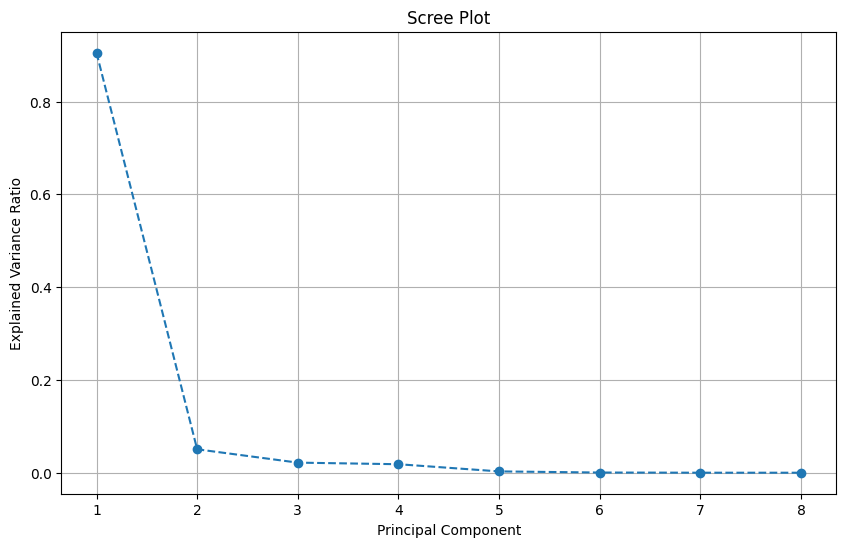

In [ ]:
# Plot Scree Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1, 1))
plt.grid()
plt.show()

In [43]:
# 최적의 주성분 개수 선택 (예: 90% 이상의 분산을 설명하는 최소 주성분 개수)
print(kmeans.n_clusters)
print(df['cluster'].nunique())

4
4


In [ ]:
# 2개의 주성분으로 변환하기 
from sklearn.decomposition import PCA

# PCA 수행



array([[ 2.48864775, -1.29871071],
       [ 4.8638416 , -0.32843484],
       [ 2.05850718, -0.4397998 ],
       ...,
       [-0.3971905 ,  0.69084294],
       [-3.94087277, -0.42488303],
       [-3.33227219,  0.22550401]])

In [ ]:
# PCA 설명된 분산 비율 출력


array([0.90514573, 0.05062617])

In [ ]:
# pc1, pc2로 결과 데이터프레임 생성 


,principal component 1,principal component 2
0,2.488648,-1.298711
1,4.863842,-0.328435
2,2.058507,-0.439800
3,5.544865,-0.087107
4,2.134990,0.387255
...,...,...
644,1.024438,1.383975
645,-1.873179,0.821719
646,-0.397191,0.690843
647,-3.940873,-0.424883


In [ ]:
# 주성분으로 군집화
k = 4



In [ ]:
# 군집 결과 시각화

In [ ]:
# PCA를 하거나 하지 않은 경우 군집 결과 비교